In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:

x,y = sklearn.datasets.make_moons(200, noise = 0.20)

In [4]:
x[:5]

array([[ 0.63779927, -0.3825385 ],
       [ 0.84079311, -0.06638657],
       [ 1.48406442,  0.4988491 ],
       [ 0.46622444,  0.74889594],
       [ 0.90503068, -0.75259735]])

In [5]:
y[:5]

array([1, 1, 0, 0, 1], dtype=int64)

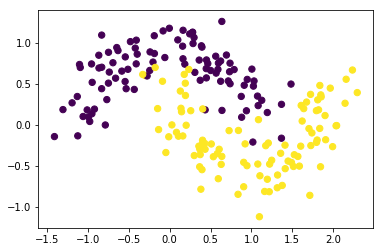

In [8]:
plt.scatter(x[:,0],x[:,1],s=40,c=y)
plt.show()

In [9]:
x =  torch.FloatTensor(x)
y = torch.LongTensor(y)

In [10]:
x

tensor([[ 6.3780e-01, -3.8254e-01],
        [ 8.4079e-01, -6.6387e-02],
        [ 1.4841e+00,  4.9885e-01],
        [ 4.6622e-01,  7.4890e-01],
        [ 9.0503e-01, -7.5260e-01],
        [ 1.5809e-01,  9.6056e-01],
        [-2.4390e-01,  6.6481e-01],
        [ 8.7531e-01,  3.4854e-01],
        [ 1.1744e+00, -2.5206e-01],
        [ 1.6395e+00,  1.9968e-01],
        [-4.3331e-01,  4.3359e-01],
        [ 4.5015e-01,  7.9278e-01],
        [-1.4754e-01,  2.0004e-01],
        [-5.3268e-01,  4.4233e-01],
        [ 1.4132e+00, -5.3217e-01],
        [ 1.9005e+00,  1.1531e-01],
        [ 4.3400e-01,  1.8458e-01],
        [ 3.0798e-01,  6.4157e-01],
        [-9.2035e-01,  1.9390e-01],
        [ 1.5866e+00, -5.0103e-01],
        [ 9.1170e-01,  4.8430e-01],
        [ 1.9298e-01,  3.5948e-01],
        [ 2.9799e-01,  1.0661e+00],
        [ 1.0780e+00, -4.7590e-01],
        [-9.5589e-01,  7.4414e-01],
        [-1.1243e+00, -1.3216e-01],
        [ 1.6744e+00,  2.7942e-01],
        [ 1.0742e+00,  3.523

In [11]:
class FeedForward(torch.nn.Module):
    def __init__(self , input_neurons , hidden_neurons , output_neurons):
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons,hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self,x):
        x=self.hidden(x)
        x=F.relu(x)
        x=self.out(x)
        return x
        

In [12]:
net = FeedForward(2,50,2)
optimizer = torch.optim.SGD(net.parameters(),lr=0.02)
loss_function = torch.nn.CrossEntropyLoss()

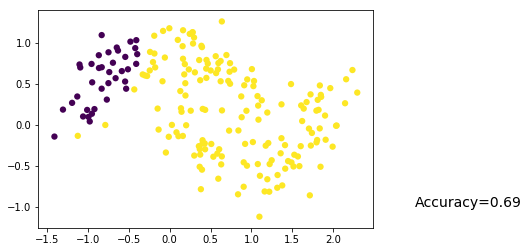

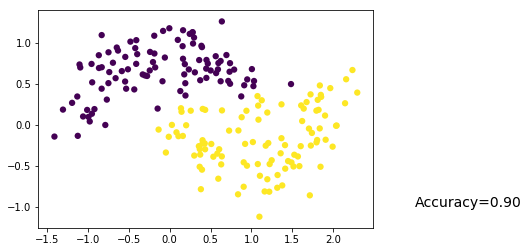

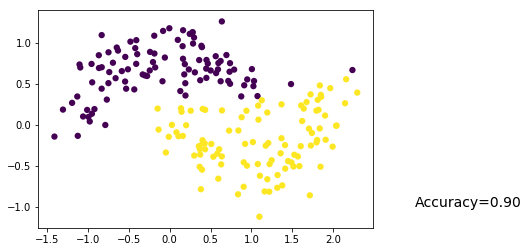

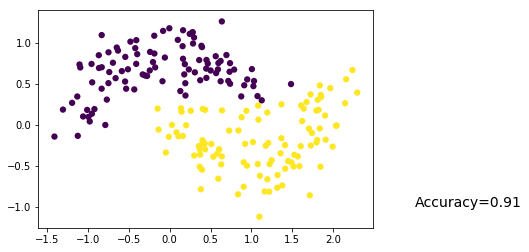

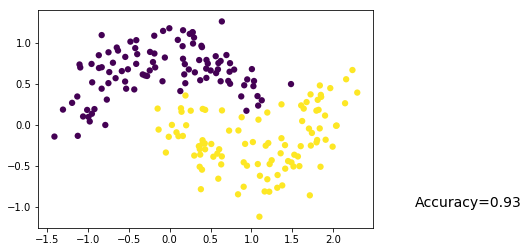

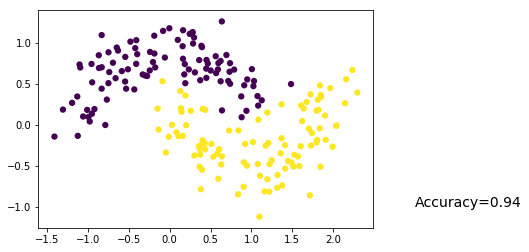

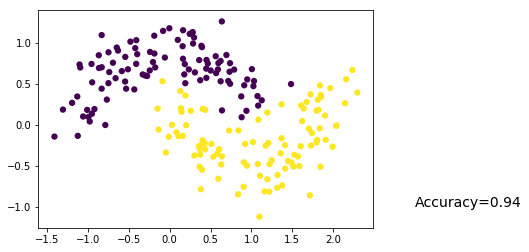

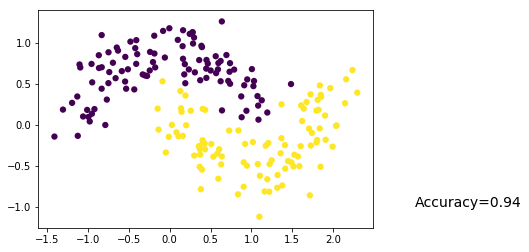

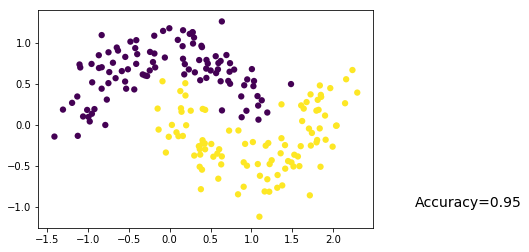

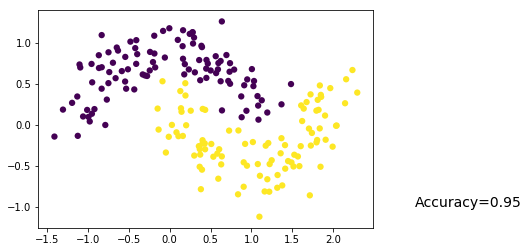

In [15]:
plt.ion()
for epoch in range(0,10000):
    #net.forward(x)
    out =net(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #visualize
    if epoch % 1000 == 0:
        max_value,prediction = torch.max(out,1)
        predicted_y=prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s=40,c=predicted_y,lw=0)
        accuracy = (predicted_y==target_y).sum()/ target_y.size
        plt.text(3,-1,'Accuracy={:.2f}'.format(accuracy),fontdict={'size':14})
        plt.pause(0.1)
        
plt.ioff()    
plt.show()